In [1]:
from src.kan.kan import KAN, KANLinear
from src.kan.fasterkan import FasterKAN
import torch
from torch import nn
from time import time
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

# use gui backend for matplotlib
matplotlib.use(matplotlib.get_backend())

def num_params(model): return sum(p.numel() for p in model.parameters() if p.requires_grad)

model_kan_32 = KAN([12,32,2])
model_kan_16 = KAN([12,16,2])
model_mlp_256 = nn.Sequential(nn.Linear(12,256), nn.ReLU(), nn.Linear(256,2))
model_mlp_512 = nn.Sequential(nn.Linear(12,512), nn.ReLU(), nn.Linear(512,2))
model_mlp_512_256 = nn.Sequential(nn.Linear(12,512), nn.ReLU(), nn.Linear(512,256), nn.ReLU(), nn.Linear(256,2))
model_fasterkan_128_128 = FasterKAN([12,128,128,2])
model_fasterkan_128_64 = FasterKAN([12,128,64,2])
model_fasterkan_64_64 = FasterKAN([12,64,64,2])

print(f"KAN 32: {num_params(model_kan_32)}")
print(f"KAN 16: {num_params(model_kan_16)}")
print(f"MLP 256: {num_params(model_mlp_256)}")
print(f"MLP 512: {num_params(model_mlp_512)}")
print(f"MLP 512 256: {num_params(model_mlp_512_256)}")
print(f"FasterKAN 128-128: {num_params(model_fasterkan_128_128)}")
print(f"FasterKAN 128-64: {num_params(model_fasterkan_128_64)}")
print(f"FasterKAN 64-64: {num_params(model_fasterkan_64_64)}")


KAN 32: 4480
KAN 16: 2240
MLP 256: 3842
MLP 512: 7682
MLP 512 256: 138498
FasterKAN 128-128: 145944
FasterKAN 128-64: 79256
FasterKAN 64-64: 40216


## Visualize

In [1]:
# from src.agent import Agent
# import pandas as pd
# name = "flappy_bird_mlp_256_128"
# # agent = Agent("flappy_bird_kan_32")
# # kan_32_scores = agent.test(render=False, num_episodes=1000)
# # agent = Agent("flappy_bird_mlp_256")
# # mlp_256_scores = agent.test(render=False, num_episodes=1000)
# # agent = Agent("flappy_bird_mlp_512")
# # mlp_512_scores = agent.test(render=False, num_episodes=1000)
# # agent = Agent("flappy_bird_kan_16")
# # kan_16_scores = agent.test(render=False, num_episodes=1000)
# agent = Agent(name)
# scores = agent.test(render=False, num_episodes=1000)
# scores_df = pd.read_csv("results/scores.csv")
# scores_df[name] = scores
# scores_df.to_csv("results/scores.csv", index=False)


Initialized environment
Loading model from runs\flappy_bird_mlp_256_128\flappy_bird_mlp_256_128.pt


Episodes: 100%|██████████| 1000/1000 [01:52<00:00,  8.86ep/s]


In [2]:
# scores_df = pd.DataFrame({"KAN-32": kan_32_scores, "KAN-16": kan_16_scores, "MLP-256": mlp_256_scores, "MLP-512": mlp_512_scores})
# scores_df.to_csv("results/scores.csv", index=False)
scores_df = pd.read_csv("results/scores.csv")
scores_dict = dict()
for column in scores_df.columns:
    scores_dict[column] = scores_df[column].tolist()
print(scores_dict)

{'EfficientKAN_32': [13, 40, 365, 82, 10, 56, 14, 143, 89, 71, 115, 46, 24, 52, 17, 2, 171, 55, 142, 19, 58, 121, 95, 110, 140, 97, 66, 2, 46, 345, 19, 13, 212, 28, 1, 69, 69, 19, 207, 175, 79, 33, 4, 69, 32, 101, 146, 173, 1, 413, 40, 206, 61, 209, 61, 11, 10, 4, 534, 81, 224, 61, 22, 95, 30, 10, 76, 301, 31, 95, 48, 38, 66, 56, 32, 98, 85, 1, 23, 153, 37, 188, 112, 145, 4, 55, 1, 29, 196, 94, 50, 58, 83, 10, 245, 19, 17, 64, 61, 116, 283, 369, 28, 25, 76, 41, 34, 205, 327, 17, 1, 38, 62, 119, 142, 112, 20, 91, 29, 16, 49, 1, 263, 57, 23, 79, 171, 78, 10, 89, 1, 8, 21, 54, 1, 138, 194, 200, 25, 56, 293, 434, 16, 36, 2, 232, 1, 49, 83, 45, 296, 7, 137, 80, 1, 11, 445, 182, 209, 25, 31, 29, 56, 97, 52, 170, 1, 16, 5, 1, 11, 46, 95, 595, 192, 73, 101, 155, 14, 28, 47, 71, 49, 38, 28, 250, 112, 63, 65, 68, 80, 140, 2, 144, 83, 76, 1, 291, 68, 7, 3, 73, 50, 64, 129, 88, 146, 52, 352, 14, 154, 86, 109, 63, 48, 181, 41, 55, 1, 114, 34, 133, 75, 38, 68, 35, 43, 152, 40, 242, 94, 5, 104, 61, 4

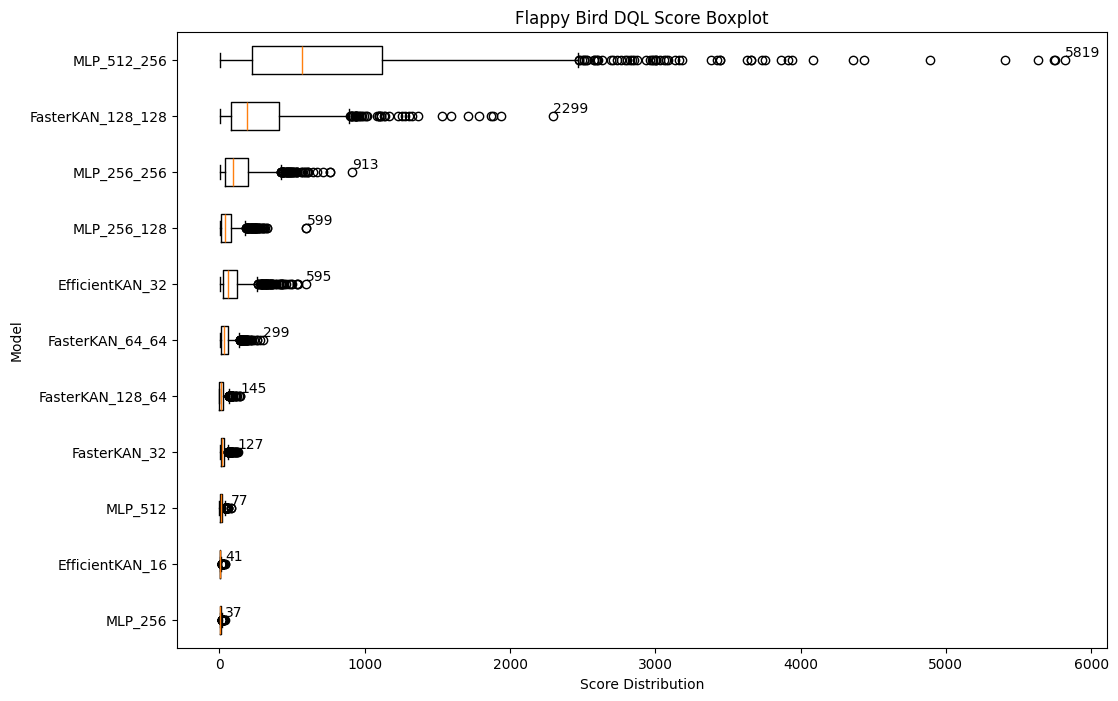

In [30]:
import matplotlib.pyplot as plt
import numpy as np
# Plot box plot, horizontal
scores_dict_sorted = dict(sorted(scores_dict.items(), key=lambda x:max(x[1])))
plt.figure(figsize=(12,8))
bplot = plt.boxplot(scores_dict_sorted.values(), vert=False,
            tick_labels=scores_dict_sorted.keys())
plt.xlabel("Score Distribution")
plt.ylabel("Model")
# Annotate the high score for each model on the plot
for i, scores_arr in enumerate(list(scores_dict_sorted.values())):
    plt.annotate(f"{np.max(scores_arr)}", (np.max(scores_arr), i+1), ha='left', va='bottom')
plt.title("Flappy Bird DQL Score Boxplot")
plt.savefig("results/high_score_boxplot.pdf")
plt.show()

In [11]:
print(list(scores_dict.keys()))

['EfficientKAN_32', 'EfficientKAN_16', 'MLP_256', 'MLP_512', 'MLP_512_256', 'FasterKAN_32', 'FasterKAN_128_128', 'FasterKAN_128_64', 'FasterKAN_64_64', 'MLP_256_256', 'MLP_256_128']


In [12]:
from src.kan.kan import KAN, KANLinear
from src.kan.fasterkan import FasterKAN
import torch
from torch import nn
from time import time
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

# use gui backend for matplotlib
matplotlib.use(matplotlib.get_backend())

def num_params(model): return sum(p.numel() for p in model.parameters() if p.requires_grad)

params_mlp_512_256 = num_params(nn.Sequential(nn.Linear(12,512), nn.ReLU(), nn.Linear(512,256), nn.ReLU(), nn.Linear(256,2)))
params_mlp_256_256 = num_params(nn.Sequential(nn.Linear(12,256), nn.ReLU(), nn.Linear(256,256), nn.ReLU(), nn.Linear(256,2)))
params_mlp_256_128 = num_params(nn.Sequential(nn.Linear(12,256), nn.ReLU(), nn.Linear(256,128), nn.ReLU(), nn.Linear(128,2)))
params_mlp_512 = num_params(nn.Sequential(nn.Linear(12,512), nn.ReLU(), nn.Linear(512,2)))
params_mlp_256 = num_params(nn.Sequential(nn.Linear(12,256), nn.ReLU(), nn.Linear(256,2)))
params_fasterkan_128_128 = num_params(FasterKAN([12,128,128,2]))
params_fasterkan_128_64 = num_params(FasterKAN([12,128,64,2]))
params_fasterkan_64_64 = num_params(FasterKAN([12,64,64,2]))
params_fasterkan_32 = num_params(FasterKAN([12,32,2]))
params_effkan_32 = num_params(KAN([12,32,2]))
params_effkan_16 = num_params(KAN([12,16,2]))

keys = list(scores_dict.keys())
values = [params_effkan_32, params_effkan_16, params_mlp_256, params_mlp_512, params_mlp_512_256, params_fasterkan_32, params_fasterkan_128_128, params_fasterkan_128_64,
          params_fasterkan_64_64, params_mlp_256_256, params_mlp_256_128]
params_dict = {i:j for i,j in zip(keys,values)}
params_dict



{'EfficientKAN_32': 4480,
 'EfficientKAN_16': 2240,
 'MLP_256': 3842,
 'MLP_512': 7682,
 'MLP_512_256': 138498,
 'FasterKAN_32': 3672,
 'FasterKAN_128_128': 145944,
 'FasterKAN_128_64': 79256,
 'FasterKAN_64_64': 40216,
 'MLP_256_256': 69634,
 'MLP_256_128': 36482}

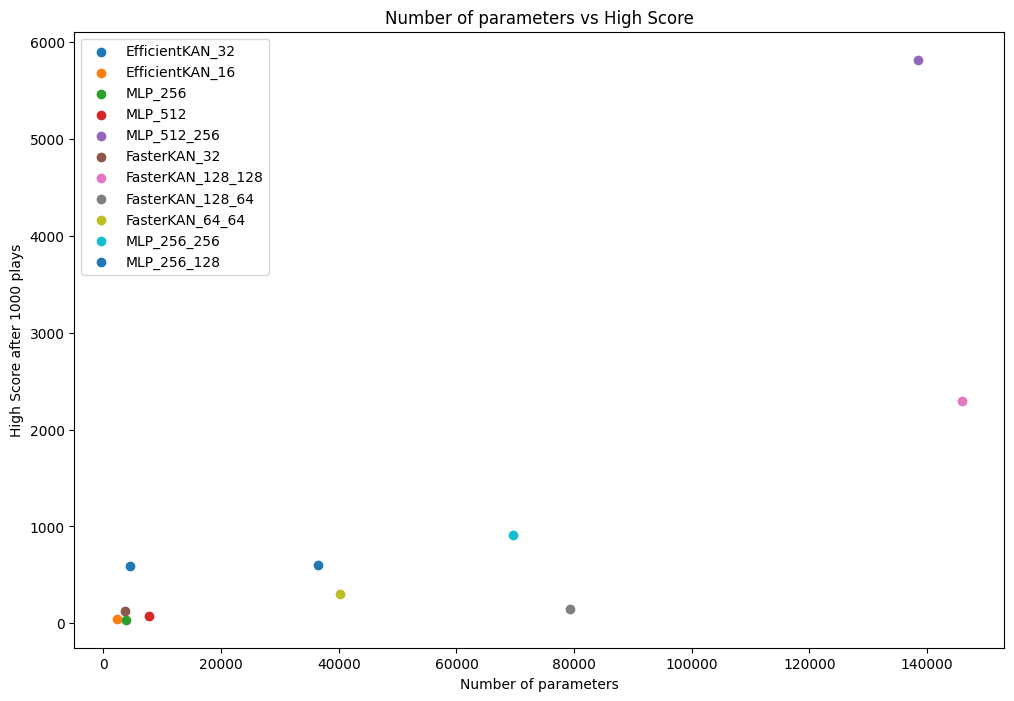

In [32]:
# Convert to numpy array
import numpy as np
# Scatter plot of number of parameters vs high score, color each model differently
plt.figure(figsize=(12,8))
for k in list(scores_dict.keys()) :
    plt.scatter(params_dict[k],max(scores_dict[k]),label=k)
plt.legend()
plt.xlabel("Number of parameters")
plt.ylabel("High Score after 1000 plays")
plt.title("Number of parameters vs High Score")
plt.savefig("results/num_params_vs_high_score.pdf")

In [21]:
import pandas as pd

# df_mlp_256 = pd.read_csv("runs/flappy_bird_mlp_256/flappy_bird_mlp_256.csv")
# episodes_mlp_256, rewards_mlp_256 = df_mlp_256["episode"].to_list(), df_mlp_256["best_reward"].to_list()
# df_mlp_512 = pd.read_csv("runs/flappy_bird_mlp_512/flappy_bird_mlp_512.csv")
# episodes_mlp_512, rewards_mlp_512 = df_mlp_512["episode"].to_list(), df_mlp_512["best_reward"].to_list()
# df_mlp_512_256 = pd.read_csv("runs/flappy_bird_mlp_512_256/flappy_bird_mlp_512_256.csv")
# episodes_mlp_512_256, rewards_mlp_512_256 = df_mlp_512_256["episode"].to_list(), df_mlp_512_256["best_reward"].to_list()
# df_fasterkan_128_128 = pd.read_csv("runs/flappy_bird_fasterkan_128_128/flappy_bird_fasterkan_128_128.csv")
# episodes_fasterkan_128_128, rewards_fasterkan_128_128 = df_fasterkan_128_128["episode"].to_list(), df_fasterkan_128_128["best_reward"].to_list()
# df_fasterkan_128_64 = pd.read_csv("runs/flappy_bird_fasterkan_128_64/flappy_bird_fasterkan_128_64.csv")
# episodes_fasterkan_128_64, rewards_fasterkan_128_64 = df_fasterkan_128_64["episode"].to_list(), df_fasterkan_128_64["best_reward"].to_list()
# df_fasterkan_64_64 = pd.read_csv("runs/flappy_bird_fasterkan_64_64/flappy_bird_fasterkan_64_64.csv")
# episodes_fasterkan_64_64, rewards_fasterkan_64_64 = df_fasterkan_64_64["episode"].to_list(), df_fasterkan_64_64["best_reward"].to_list()

In [28]:
from glob import glob
csv_files = []
for i in glob("runs/*/*.csv"):
    csv_files.append(i)

print(csv_files)

['runs\\flappy_bird_fasterkan_128_128\\flappy_bird_fasterkan_128_128.csv', 'runs\\flappy_bird_fasterkan_128_64\\flappy_bird_fasterkan_128_64.csv', 'runs\\flappy_bird_fasterkan_32\\flappy_bird_fasterkan_32.csv', 'runs\\flappy_bird_fasterkan_64_32\\flappy_bird_fasterkan_64_32.csv', 'runs\\flappy_bird_fasterkan_64_64\\flappy_bird_fasterkan_64_64.csv', 'runs\\flappy_bird_kan_16\\flappy_bird_kan_16.csv', 'runs\\flappy_bird_kan_32\\flappy_bird_kan_32.csv', 'runs\\flappy_bird_mlp_256\\flappy_bird_mlp_256.csv', 'runs\\flappy_bird_mlp_256_128\\flappy_bird_mlp_256_128.csv', 'runs\\flappy_bird_mlp_256_256\\flappy_bird_mlp_256_256.csv', 'runs\\flappy_bird_mlp_512\\flappy_bird_mlp_512.csv', 'runs\\flappy_bird_mlp_512_256\\flappy_bird_mlp_512_256.csv']


Text(0.5, 1.0, 'DQN Training Best Reward by Episodes')

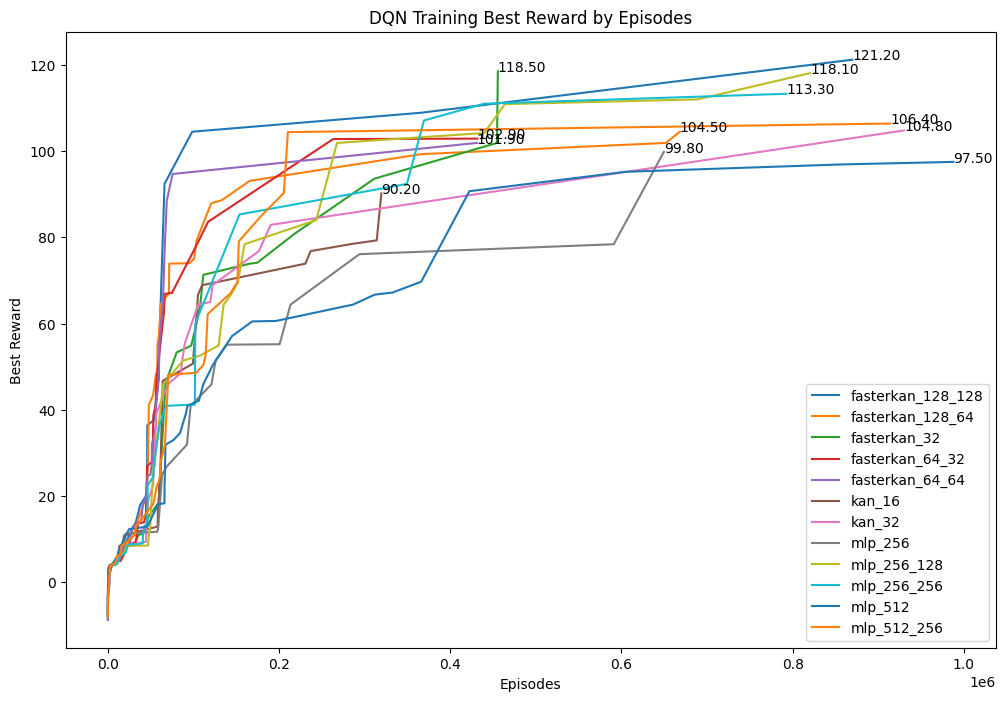

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    episodes, best_rewards = df["episode"].tolist(), df["best_reward"].tolist()
    plt.plot(episodes, best_rewards, label=csv_file.split("\\")[-1][12:-4])
    plt.annotate(f"{max(best_rewards):.2f}", (episodes[-1], max(best_rewards)))

plt.legend()
plt.xlabel("Episodes")
plt.ylabel("Best Reward")
plt.title("DQN Training Best Reward by Episodes")
# Annotate highest reward by each model
# plt.annotate(f"{max(rewards_mlp_256):.2f}", (episodes_mlp_256[-1], max(rewards_mlp_256)))
# plt.annotate(f"{max(rewards_mlp_512):2f}", (episodes_mlp_512[-1], max(rewards_mlp_512)))
# plt.annotate(f"{max(rewards_mlp_512_256):2f}", (episodes_mlp_512_256[-1], max(rewards_mlp_512_256)))
# plt.annotate(f"{max(rewards_fasterkan_128_128):2f}", (episodes_fasterkan_128_128[-1], max(rewards_fasterkan_128_128)))
# plt.annotate(f"{max(rewards_fasterkan_128_64):2f}", (episodes_fasterkan_128_64[-1], max(rewards_fasterkan_128_64)))
# plt.annotate(f"{max(rewards_fasterkan_64_64):2f}", (episodes_fasterkan_64_64[-1], max(rewards_fasterkan_64_64)))